# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 12


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  40 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  40 баллов







-----

In [ ]:
# Bot check

# HW_ID: phds_hw12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Импорты из sklearn:

In [44]:

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## Задача 1

Реализуйте функции:

- скользящего среднего
- экспоненциального сглаживания
- двойного эскпоненциального сглаживания (метод Хольта)

Визуализируйте результаты работы функций.




### 0. Загрузка данных

#### **Профиль физика**


В этой задаче мы будем работать с данными по электропотреблению. Данные можете скачать с [сайта](https://miptstats.github.io/courses/ad_mipt.html).

In [ ]:
file_path = <...> # путь до файла с данными
data = pd.read_csv(file_path, index_col=[0], parse_dates=[0])
data.head()

Мы будем работать с колонкой `nat_demand`. Проверьте, есть ли в этом столбце пропуски. Если да - удалите эти строки.

In [ ]:
<...>

Визуализируйте, как изменяется таргет с течением времени. Какие зависимости вы можете увидеть?

In [ ]:
<...>

#### **Профиль биология**

В этом домашнем задании мы будем работать с данными о сердцебиении человека во время сна. Скачать и изучить подробнее [здесь](https://www.kaggle.com/datasets/jacekmakola/goodnight1).

In [3]:
data = pd.read_csv('hrb_sample_1.csv')
data

,Name,Sport,Date,Start time,Duration,Total distance (km),Average heart rate (bpm),Average speed (km/h),Max speed (km/h),Average pace (min/km),...,Training load,Ascent (m),Descent (m),Notes,Height (cm),Weight (kg),HR max,HR sit,VO2max,Unnamed: 25
0,Jacek Makola,OTHER_INDOOR,03-08-2019,22:53:24,07:50:53,NaN,54,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,182.0,75.0,178.0,55.0,49.0,NaN
1,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,00:00:00,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,00:00:01,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,00:00:02,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28251,NaN,07:50:49,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28252,NaN,07:50:50,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28253,NaN,07:50:51,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28254,NaN,07:50:52,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Формат данных достаточно специфичен. Очистим нашу таблицу от ненужной информации.

In [4]:
data = pd.DataFrame(data.values, columns=data.loc[1])
data = data.drop(0)
data = data.drop(1)
data.tail()

1,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28251,NaN,07:50:49,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28252,NaN,07:50:50,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28253,NaN,07:50:51,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28254,NaN,07:50:52,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28255,NaN,07:50:53,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Уберем лишние колонки.

In [5]:
data = data[['Time', 'HR (bpm)']]

Колонку `Time` преобразуем к правильному типу данных и поставим вместо индексов.

In [6]:
data["Time"] = pd.to_datetime(data['Time'])
data = data.set_index('Time')

<ipython-input-6-0516974112fa>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Time"] = pd.to_datetime(data['Time'])


Посмотрим, в каком формате хранятся данные о сердцебиении.

In [7]:
type(data['HR (bpm)'][0])

str

Переведите значения `HR (bpm)` к целым числам.

In [8]:
data['HR (bpm)']=data['HR (bpm)'].astype(int)
type(data['HR (bpm)'][0])

numpy.int64

Визуализируйте, как изменяется таргет с течением времени. Какие зависимости вы можете увидеть?

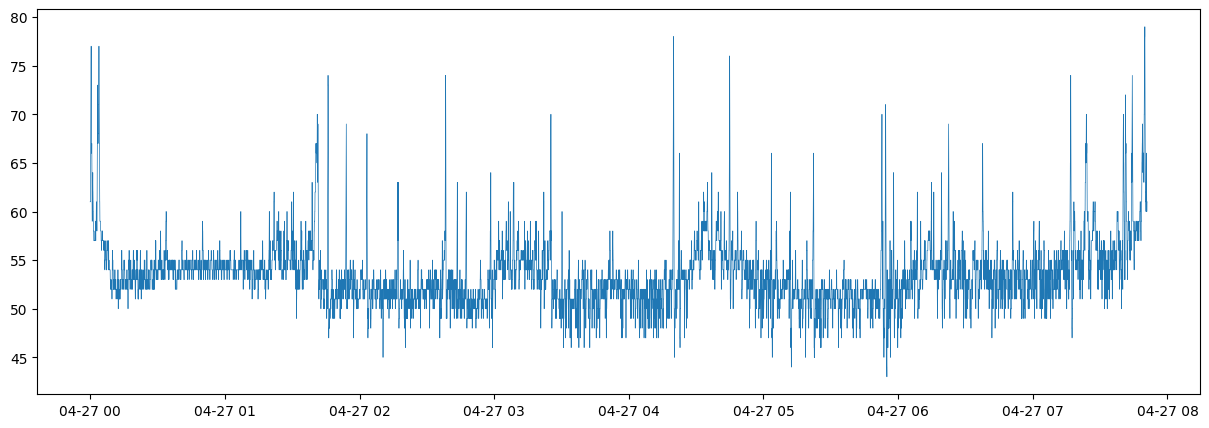

In [9]:
y=data['HR (bpm)']
plt.figure(figsize=(15,5))
plt.plot(y, lw=0.5);


### 1. Скользящее среднее

In [10]:
def moving_average(series:pd.Series, n:int)->pd.Series:
    '''
    series:pd.Series - исходные данные
    n:int - величина скользящего окна

    output:pd.Series - сглаженные данные
    '''
    sum = np.cumsum(series, dtype=float)
    sum[n:] = sum[n:] - sum[:-n]
    output=sum[n - 1:] / n
    return output

Нарисуйте на одном графике исходные данные и обработанные скользящим средним. Рассмотрите минимум **два** разных `n` и обоснуйте свой выбор этих значений.

*Замечание: при корректной реализации функции первые элементы превратятся в NaN, поэтому рисовать график нужно для `series[n:]`*

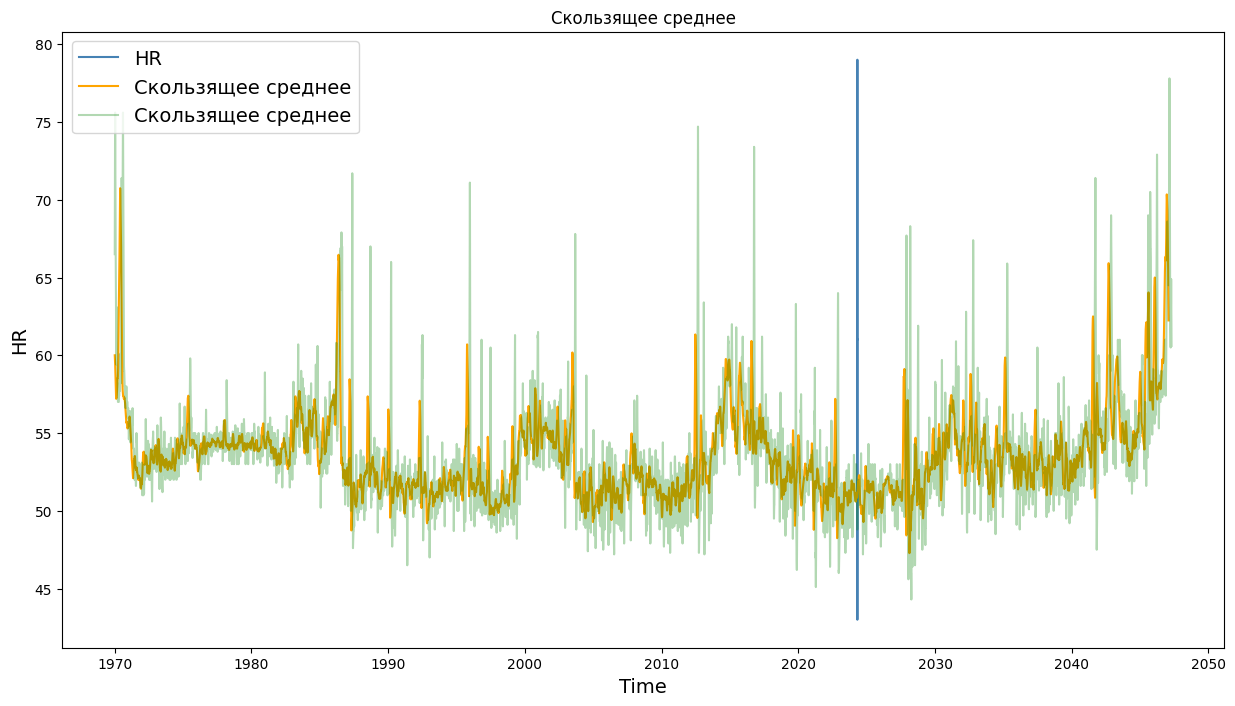

In [38]:
plt.figure(figsize = (15,8))

plt.plot(data['HR (bpm)'] , label = 'HR', color = 'steelblue')
plt.plot(moving_average(np.array(data[50:]), n=50), label = 'Скользящее среднее', color = 'orange')
plt.plot(moving_average(np.array(data[10:]), n=10), label = 'Скользящее среднее', color = 'green', alpha=0.3)
plt.legend(title = '', loc = 'upper left', fontsize = 14)

plt.xlabel('Time', fontsize = 14)
plt.ylabel('HR', fontsize = 14)
plt.title('Скользящее среднее')

plt.show()

### 2. Экспоненциальное сглаживание

In [20]:
def exponential_smoothing(series:pd.Series, alpha:float)->pd.Series:
    '''
    series:pd.Series - исходные данные
    alpha:float - сглаживающий фактор
    '''
    res = [series[0]]

    for n in range(1, len(series)):
        res.append(alpha * series[n] + (1 - alpha) * res[n-1])
    return res

Нарисуйте на одном графике исходные данные и обработанные функцией экпоненциального сглаживания. Рассмотрите минимум **два** разных `alpha`. Следите за аккуратностью графика.


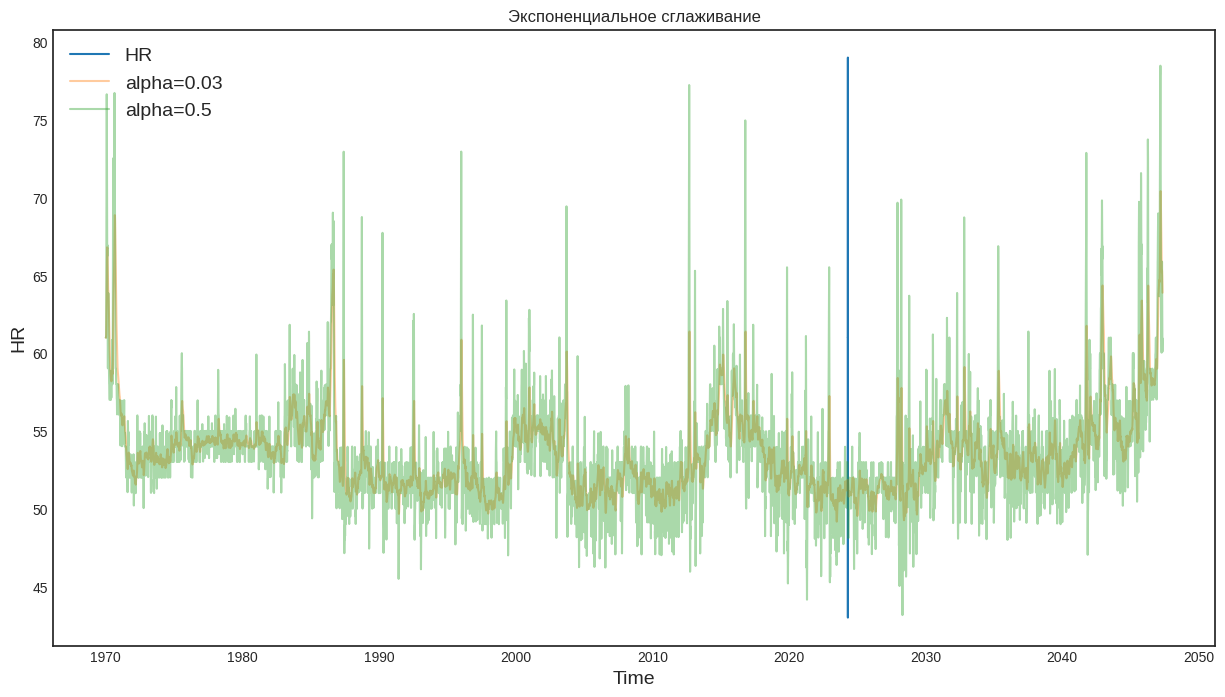

In [28]:
with plt.style.context('seaborn-white'):
  plt.figure(figsize = (15,8))

  plt.plot(data['HR (bpm)'] , label = 'HR')
  for alpha in [0.03, 0.5]:
    plt.plot(exponential_smoothing(data["HR (bpm)"], alpha), label='alpha={}'.format(alpha), alpha=0.4)
  plt.legend(title = '', loc = 'upper left', fontsize = 14)

  plt.xlabel('Time', fontsize = 14)
  plt.ylabel('HR', fontsize = 14)
  plt.title('Экспоненциальное сглаживание')
  plt.show()


### 3. Двойное экспоненциальное сглаживание (метод Хольта)

In [34]:
def double_exponential_smoothing(series, alpha:float, beta:float)->pd.Series:
    '''
    series:pd.Series - исходные данные
    alpha:float - сглаживающий фактор
    beta:float - сглаживающий фактор
    '''
    res = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0] # уровень и тренд
        if n >= len(series): # прогнозируем
            val = res[-1]
        else:
            val = series[n]
        last_level, level = level, alpha*val + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        res.append(level+trend)
    return res

Нарисуйте на одном графике исходные данные и обработанные функцией двойного экпоненциального сглаживания. Рассмотрите минимум **три** разных пары `alpha` и `beta`. Следите за аккуратностью графика.

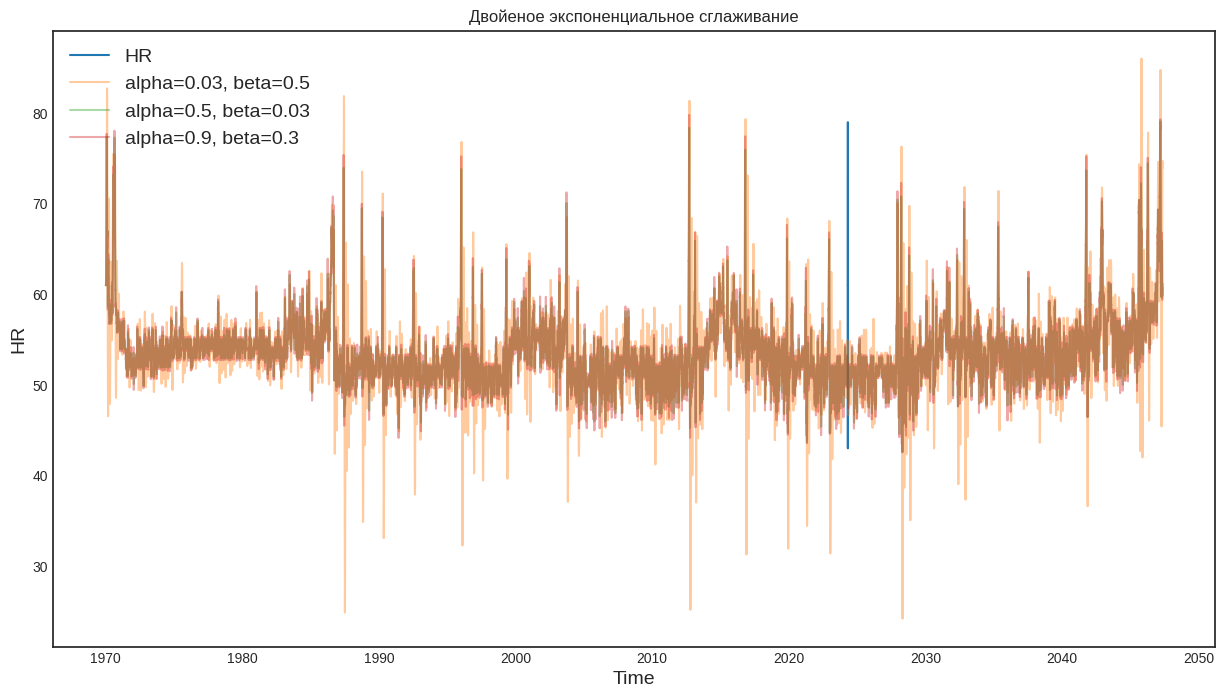

In [37]:
with plt.style.context('seaborn-white'):
  plt.figure(figsize = (15,8))

  plt.plot(data['HR (bpm)'] , label = 'HR')
  for alpha, beta in [(0.03,0.5), (0.5,0.03), (0.9,0.3)]:
    plt.plot(double_exponential_smoothing(data["HR (bpm)"], alpha, beta), label='alpha={}, beta={}'.format(alpha, beta), alpha=0.4)
  plt.legend(title = '', loc = 'upper left', fontsize = 14)

  plt.xlabel('Time', fontsize = 14)
  plt.ylabel('HR', fontsize = 14)
  plt.title('Двойеное экспоненциальное сглаживание')
  plt.show()

## Задача 2.

Продолжайте работать с выбранными данными. Разбейте их таким образом, чтобы в тесте остались последние 20% измерений.



In [47]:
X=data['HR (bpm)']
test_size=int(0.2*len(X))
train=X.iloc[:-test_size]
test=X.iloc[-test_size:]

### 1. Baseline

В любой задаче машинного обучения сначала полезно строить простые модели, так называемые `baseline`. Сгенерируйте фичи из даты. Поясните свой выбор.

In [46]:
def create_date_features(date):
    """Создает фичи из даты"""
    row = {}
    row["dayofweek"] = date.dayofweek
    row["quarter"] = date.quarter
    row["month"] = date.month
    row["year"] = date.year
    row["dayofyear"] = date.dayofyear
    row["dayofmonth"] = date.day
    row["weekofyear"] = date.weekofyear
    return row

def create_only_date_train_features(y_series):
    """
    Создает обучающий датасет из признаков, полученных из дат для y_series
    """
    time_features = pd.DataFrame(
    [create_date_features(date) for date in y_series.index] )
    return time_features, y_series

In [48]:
X_train, y_train = create_only_date_train_features(train)
X_test, y_test = create_only_date_train_features(test)

**Ответ:**

Обучите линейную регрессию с регуляризацией и случайный лес на ваших данных.

In [67]:
model=Ridge()
forest=RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Визуализируйте полученные прогнозы.

In [68]:
def plot_results(y_to_train, y_to_test, y_forecast):
    """
    Функция для визуализации временного ряда и предсказания.
    Параметры:
        - y_to_train: pd.Series
            Временной ряд, на котором обучалась модель.
        - y_to_test: pd.Series
            Временной ряд, который предсказывает модель.
        - y_forecast: array
            Предсказания модели.
        - plot_conf_int: bool
            Надо ли строить предсказательного интервал.
        - left_bound: array
            Левая граница предсказательного интервала.
        - right_bound: array
            Правая граница предсказательного интервала.
    """
    plt.figure(figsize=(15, 5))
    plt.title("HR (bpm)", fontsize=15)
    plt.plot(y_to_train, label="train")
    plt.plot(y_to_test, label="test")
    plt.plot(y_to_test.index, y_forecast, label="prediction")
    plt.legend()
    plt.show()

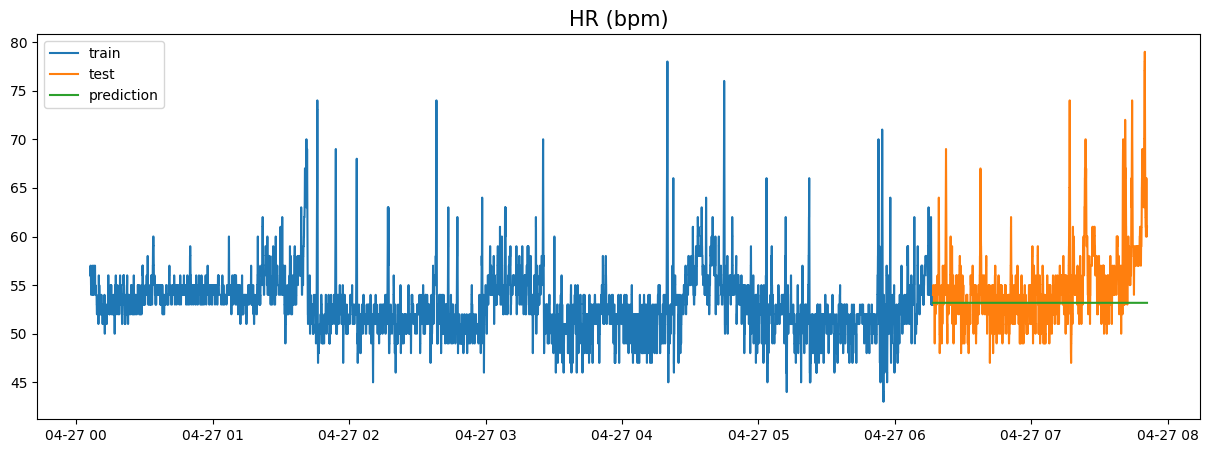

In [92]:
y_pred_model=model.predict(X_test)
plot_results(y_train, y_test, y_pred_model)

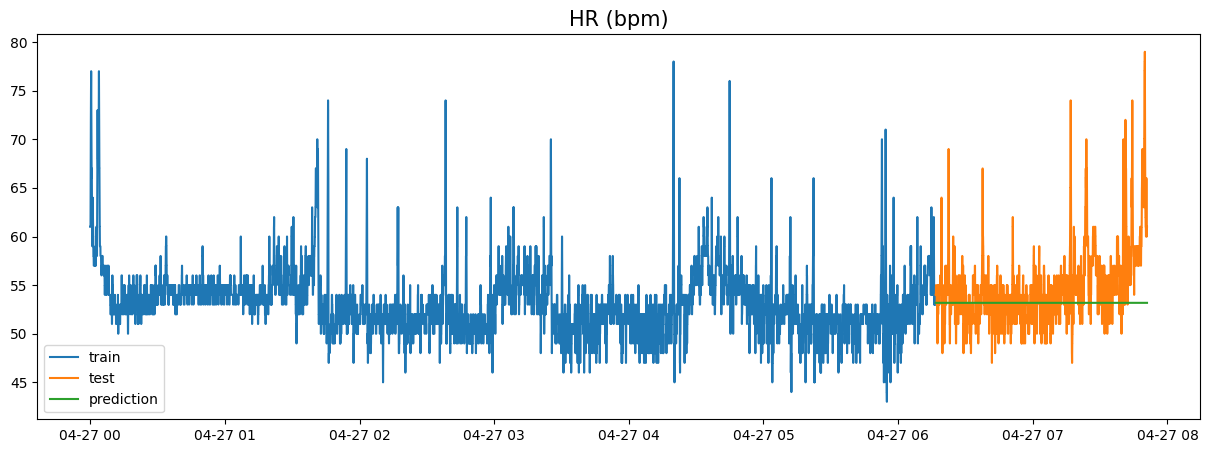

In [70]:
y_pred_forest=forest.predict(X_test)
plot_results(y_train, y_test, y_pred_forest)

Посчитайте метрики.

In [59]:
y_pred_model=model.predict(X_test)
print('MSE:', mean_squared_error(y_pred_model, y_test), 'MAE:', mean_absolute_error(y_pred_model, y_test), 'MAPE:', mean_absolute_percentage_error(y_pred_model, y_test), sep=' ')

MSE: 18.9488631880484 MAE: 2.83127359399151 MAPE: 0.05324106964352727


In [61]:
y_pred_tree=forest.predict(X_test)
print('MSE:', mean_squared_error(y_pred_tree, y_test), 'MAE:', mean_absolute_error(y_pred_tree, y_test), 'MAPE:', mean_absolute_percentage_error(y_pred_tree, y_test), sep=' ')

MSE: 18.95137736039091 MAE: 2.8314453320972213 MAPE: 0.053245011386029675


### 2. Рекурсивная стратегия

Обучите линейную регрессию с регуляризацией и случайный лес используя рекурсивную стратегию.



In [78]:
random_forest = RandomForestRegressor(n_estimators=300, random_state=42)
random_forest.fit(X_train, y_train)
def recursive_prediction(
    model, test_dates, y_to_train, features_creation_function
):
    """
    Функция для рекурсивного предсказания для дат,
    указанных в test_dates.

    Параметры:
        - model
            МЛ-модель.
        - test_dates
            массив с датами, в которые надо сделать предсказания.
        - features_creation_function
            функция для создания тестовых признаков
    """
    predictions = []
    previous_y = list(y_to_train)

    for date in test_dates:
        row = features_creation_function(date, previous_y)
        curr_test = pd.DataFrame([row])
        curr_prediction = model.predict(curr_test)[0]
        previous_y.append(curr_prediction)
        predictions.append(curr_prediction)
    return np.array(predictions)

In [79]:
random_forest_predictions = recursive_prediction(
    random_forest,
    test.index,
    train,
    lambda date, previous_y: create_date_features(date),
)


In [71]:
ridge_linear_regression=recursive_prediction(
    model,
    test.index,
    train,
    lambda date, previous_y: create_date_features(date)
)

Визуализируйте полученные прогнозы.

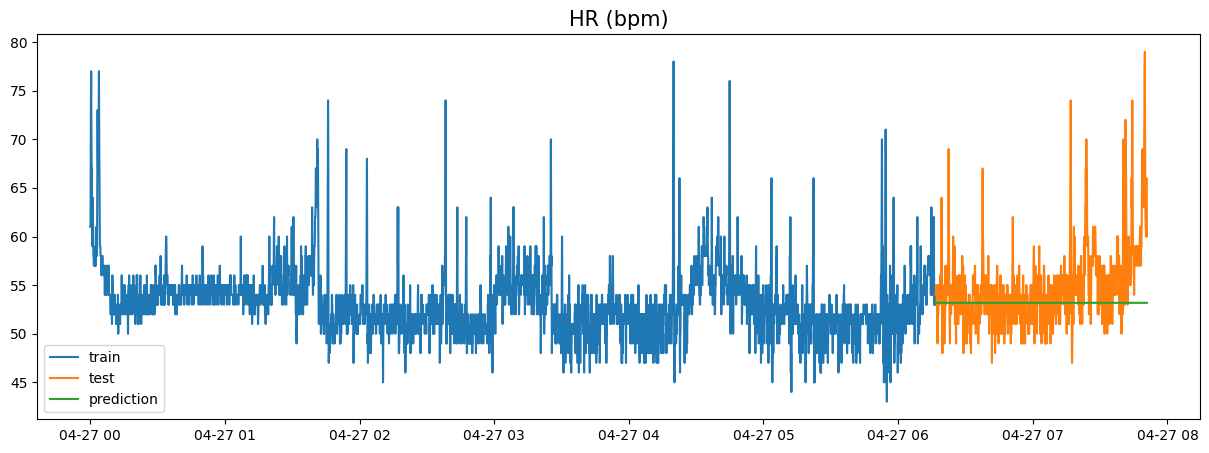

In [80]:
plot_results(y_train, y_test, random_forest_predictions)

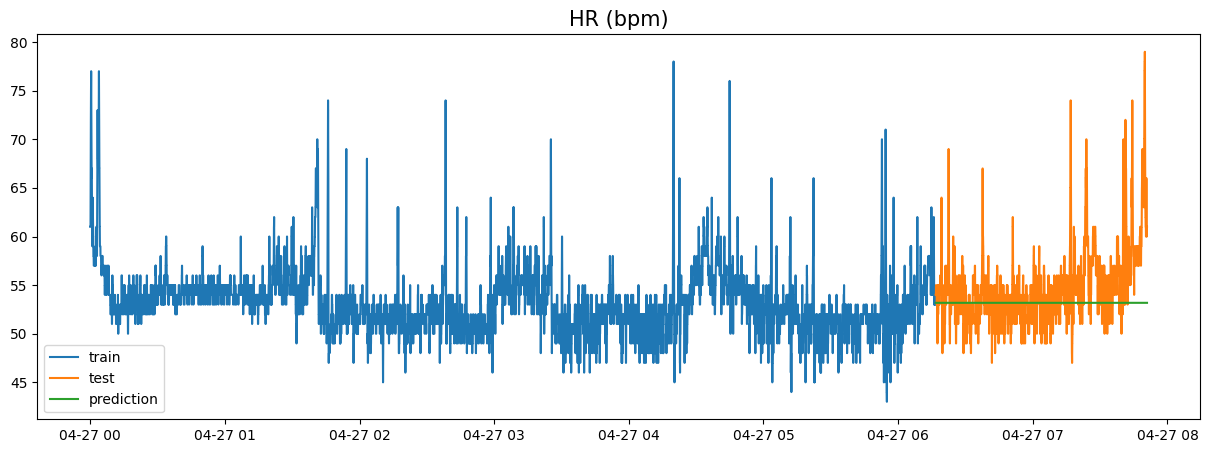

In [75]:
plot_results(y_train, y_test, ridge_linear_regression)

Посчитайте метрики.

In [76]:

print('MSE:', mean_squared_error(random_forest_predictions, y_test), 'MAE:', mean_absolute_error(random_forest_predictions, y_test), 'MAPE:', mean_absolute_percentage_error(random_forest_predictions, y_test), sep=' ')

MSE: 18.95137736039091 MAE: 2.8314453320972213 MAPE: 0.053245011386029675


### 3. Временные сдвиги

Поработаем еще с признаками. На этот раз добавим сдвиги по времени. Таким образом модель сможет использовать информацию из прошлого, для составления прогноза на будущее. Добавьте новые признаки к вашим данным.

In [81]:
def create_date_and_shifted_train_features(
    y_series, shifts=5, week_seasonal_shifts=1, year_seasonal_shifts=1
):
    """
    Создает обучающий датасет из признаков, полученных из дат
    и значений ряда ранее.
    При этом используются значения ряда со сдвигами
    на неделю и год назад.

    Параметры:
        - y_series
            временной ряд.
        - shifts
            дневной сдвиг.
        - week_seasonal_shifts
            недельный сдвиг.
        - year_seasonal_shifts
            годовой сдвиг.
    """

    curr_df, y = create_only_date_train_features(y_series)
    curr_df.index = y_series.index

    # применяем сдвиг по дням
    for shift in range(1, shifts + 1):
        curr_df[f"shift_{shift}"] = y_series.shift(shift, axis=0)

    # применяем сдвиг по неделям
    for shift in range(1, week_seasonal_shifts + 1):
        curr_df[f"week_seasonal_shift_{shift}"] = y_series.shift(
            shift * 7, axis=0
        )

    # применяем сдвиг по годам
    for shift in range(1, year_seasonal_shifts + 1):
        curr_df[f"year_seasonal_shift_{shift}"] = y_series.shift(
            shift * 365, axis=0
        )
    y = y_series

    # удалим первые строчки с nan
    drop_indices = curr_df.index[curr_df.isna().sum(axis=1) > 0]
    curr_df = curr_df.drop(index=drop_indices)
    y = y.drop(index=drop_indices)
    return curr_df, y

In [82]:
def date_and_shift_features_generator_for_test(date, previous_y):
    """Функция создания признаков из дат исдвигов ряда для тестовых дат"""

    row = create_date_features(date)
    for shift in range(1, SHIFT + 1):
        row[f"shift_{shift}"] = previous_y[-1 * shift]
    for shift in range(1, WEEK_SHIFT + 1):
        row[f"week_seasonal_shift_{shift}"] = previous_y[-1 * shift * 7]
    for shift in range(1, YEAR_SHIFT + 1):
        row[f"year_seasonal_shift_{shift}"] = previous_y[-1 * shift * 365]
    return row

In [88]:
SHIFT = 5  # дневной сдвиг
WEEK_SHIFT = 10 # недельный сдвиг
YEAR_SHIFT = 1  # годовой сдвиг
X_train, y_train = create_date_and_shifted_train_features(
    train,
    shifts=SHIFT,
    week_seasonal_shifts=WEEK_SHIFT,
    year_seasonal_shifts=YEAR_SHIFT,
)

Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [84]:
%%time
shifted_features_random_forest = RandomForestRegressor(
    n_estimators=300, random_state=42
)
shifted_features_random_forest.fit(X_train, y_train)

CPU times: user 37.5 s, sys: 131 ms, total: 37.7 s
Wall time: 38.9 s


RandomForestRegressor(n_estimators=300, random_state=42)

In [89]:
shifted_features_random_forest_predictions = recursive_prediction(
    shifted_features_random_forest,
    test.index,
    train,
    date_and_shift_features_generator_for_test,
)

Визуализируйте полученные прогнозы.

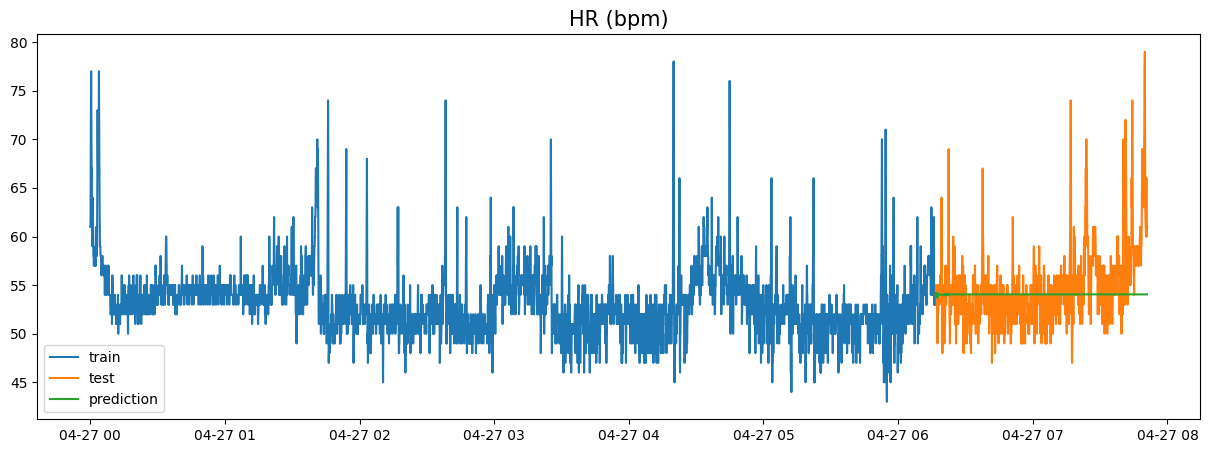

In [91]:
plot_results(
    train,
    test,
    shifted_features_random_forest_predictions,
)

Посчитайте метрики.

Сделайте выводы по задаче.

**Вывод:**

## Задача 3.

Используя функции, реализованные в задаче 1, добавьте сглаживание в ваш датасет. Поясните выбор функции сглаживания.

In [ ]:
<...>

Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [ ]:
<...>

Визуализируйте полученные прогнозы.

In [ ]:
<...>

Посчитайте метрики.

In [ ]:
<...>

**Вывод:**

## Задача 4.

Вспомним, что при построении деревьев в задаче регрессии для каждого листа вычисляется среднее по всем обучающим объектам, которые попали в данный лист. Тем самым значение в листе лежит в пределах области значений таргета на обучении (не превосходит максимального, не меньше минимального). В связи с этим деревья не могут предсказывать значения за пределами этой области. Зависимости в задачах временных рядов не редко имеют некоторый тренд, например, значения на тестовой части временного ряда могут оказаться вне области значений обучающей части ряда. Это означает, что решающее дерево не сможет построить хороший прогноз временного ряда. Проблема также распространяется на случайный лес.

В данной задаче вы реализуете другой способ прогнозирования временных рядов, который может решить эту проблему.

Исследуйте `Ridge`, `Lasso` и `ElasticNet` с различными параметрами на данных из предыдущей задачи. Подберите лучшую линейную модель.

In [ ]:
<...>

y_pred = <...>

Посчитайте остатки прогноза вашей модели на тренировочной выборке. Остатком является разность истинного значния и спрогнозированного.

In [ ]:
<...>

Теперь сделаем необычный ход &mdash; научим случайный лес предсказывать ошибку линейной модели. Для этого за `Х` возьмем исходные признаки, а за `y` - вектор разностей, который вы посчитали в ячейке выше.

Предскажем ошибку линейной модели на тестовой выборке. Получим вектор предсказанных ошибок.

In [ ]:
errors_pred = <...>

Теперь сложим прогноз линейной модели для тестовой выборки и прогноз ошибок случайного леса для этой же тестовой выборки. Посчитайте метрики для полученного вектора.

In [ ]:
<...>

Визуализируйте новый прогноз.

In [ ]:
<...>

Сделайте вывод.

**Вывод:**<...>

Процедура, которую вы сейчас провели, называется **бустинг**. В этой модели последовательно объединяются деревья, которые учатся предсказывать ошибку предыдущего дерева. Благодаря такой схеме модели удается достичь высокого качества. Подробнее с бустингом мы ознакомимся в следующем семестре.